<a href="https://colab.research.google.com/github/KUNALKEDARI20/Forecasting-Project/blob/main/Reliance_Industries_StockPrice_Prediction_%3E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
reliance=pd.read_csv('/content/RELIANCE.NS.csv') #parse date helps to recognize Date column as datetime object
reliance  #Time series data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
1,2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2,2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
3,2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
4,2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...,...
6074,2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
6075,2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
6076,2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0
6077,2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0


**Date:**The date of the trading day.  
**Open:**The price at which the stock opened for trading at the beginning of the trading day.  
**High:**The highest price of the stock reached during the trading day.  
**Low:**The lowest price of the stock reached during the trading day.  
**Close:** The price at which the stock closed at the end of the trading day.  
**Adj Close:** The adjusted closing price of the stock, which accounts for any corporate actions such as dividends, stock splits, or mergers. This price is adjusted to reflect the true value of the stock after these events.  
**Volume:**The total number of shares traded on that trading day, indicating the level of market activity.







In [3]:
# Convert 'date' column to datetime and set it as the index
reliance['Date'] = pd.to_datetime(reliance['Date'])
reliance.set_index('Date', inplace=True)

In [4]:
reliance

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...
2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0


#EDA=Exoplatary Data Analysis

In [5]:
reliance.info()#There are 10 observations which are null values(missing values)in all columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6079 entries, 2000-01-03 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6069 non-null   float64
 1   High       6069 non-null   float64
 2   Low        6069 non-null   float64
 3   Close      6069 non-null   float64
 4   Adj Close  6069 non-null   float64
 5   Volume     6069 non-null   float64
dtypes: float64(6)
memory usage: 332.4 KB


**1.Missing Value and Imputation**

In [6]:
reliance.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [7]:
#Extracting the rows that contain null values in dataset
missing_rows=reliance[reliance.isnull().any(axis=1)]
missing_rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-04-14,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-26,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#As the row contains more than 5 missing values it can be deleted from data set
#mean=reliance.mean()
#mean
reliance_df=reliance.dropna(thresh=6) #drop rows that contain less than 6 null values
reliance_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...
2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0


In [9]:
reliance_df.shape

(6069, 6)

In [10]:
reliance_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6.069000e+03
mean,689.282224,697.132526,680.887468,688.717071,665.596257,1.759492e+07
std,744.042341,751.140627,736.631838,743.652502,746.829061,1.927247e+07
min,29.347902,31.347273,28.155420,29.019436,21.542969,0.000000e+00
25%,114.392555,116.963173,113.971260,115.435089,100.121124,6.592663e+06
50%,431.793610,437.051025,425.621887,431.610748,396.301300,1.052491e+07
75%,852.798096,861.164246,843.151917,851.518066,828.857910,2.120097e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,3.161448e+08


**3.Duplicates**

In [11]:
reliance_df[reliance_df.duplicated()].shape # 0 duplicate rows

(1, 6)

In [12]:
reliance_df=reliance_df.drop_duplicates()

In [13]:
reliance_df[reliance_df.duplicated()].shape

(0, 6)

#Visualization

#Subplot

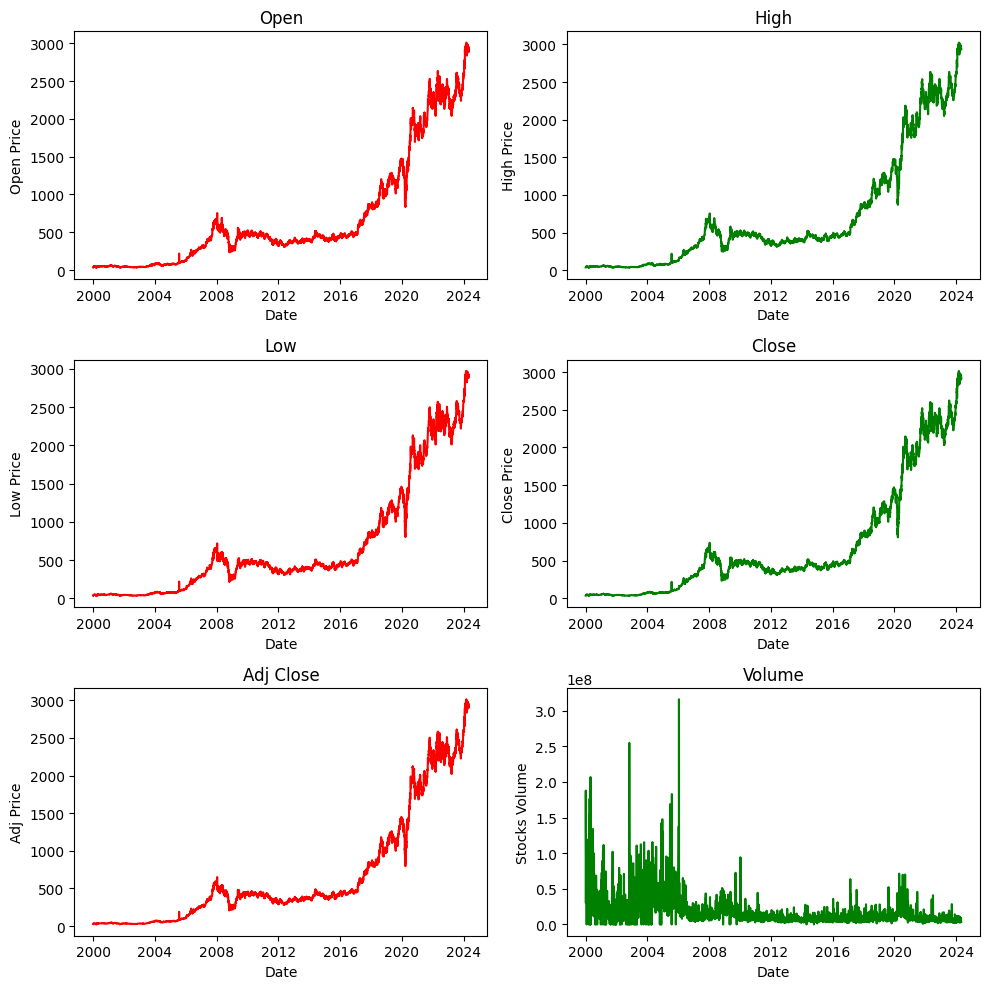

In [14]:
#Subplot

#Increasing trend is observed

plt.figure(figsize=(10,10))
# Create the first subplot
plt.subplot(3, 2, 1)
plt.plot(reliance_df['Open'],color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')

# Create the second subplot
plt.subplot(3, 2, 2)
plt.plot(reliance_df['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')

# Create the third subplot
plt.subplot(3, 2, 3)
plt.plot(reliance_df['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

# Create the fourth subplot
plt.subplot(3, 2, 4)
plt.plot(reliance_df['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')

# Create the fifth subplot
plt.subplot(3, 2, 5)
plt.plot(reliance_df['Adj Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Adj Price')
plt.title('Adj Close')

# Create the sixth subplot
plt.subplot(3, 2, 6)
plt.plot(reliance_df['Volume'],color='green')
plt.xlabel('Date')
plt.ylabel('Stocks Volume')
plt.title('Volume')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#Upward linear trend with multiplicative seasonality

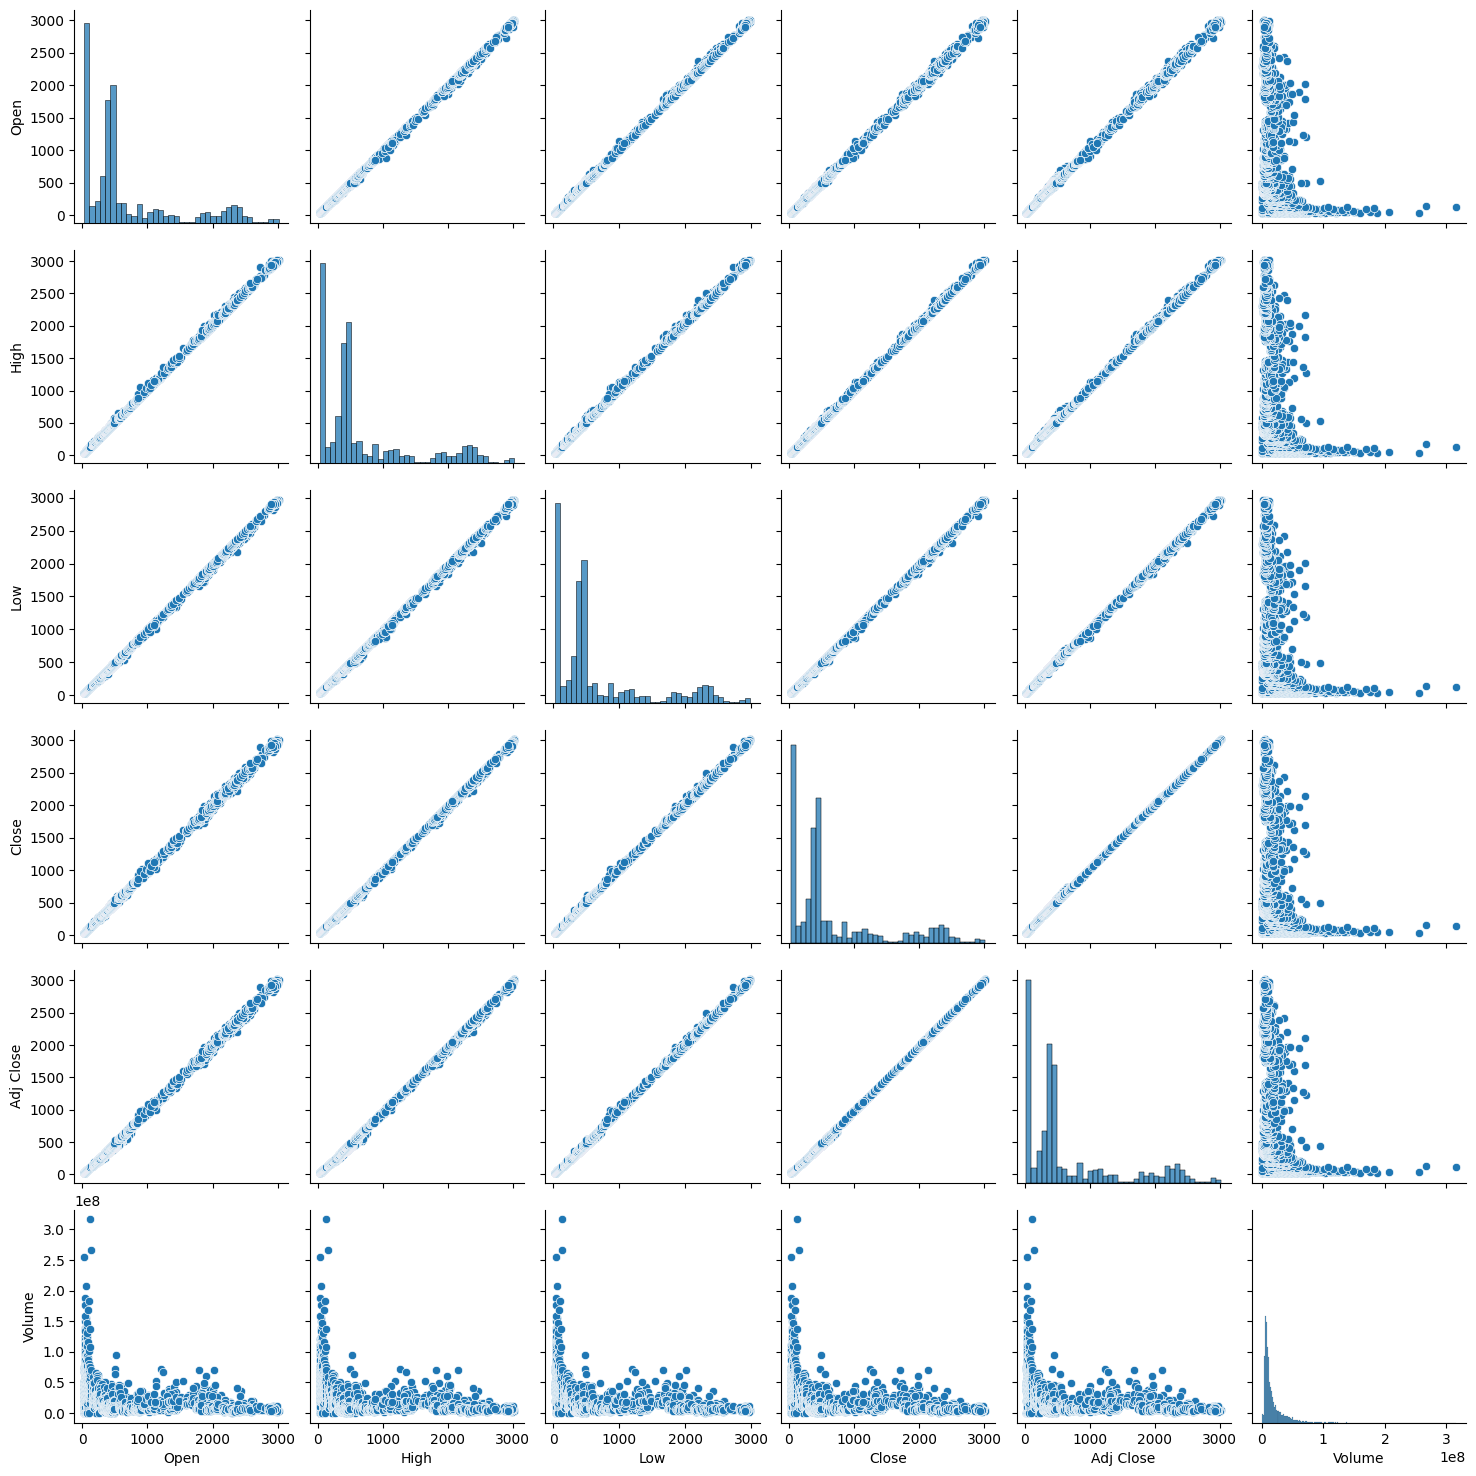

In [15]:
sns.pairplot(reliance_df)

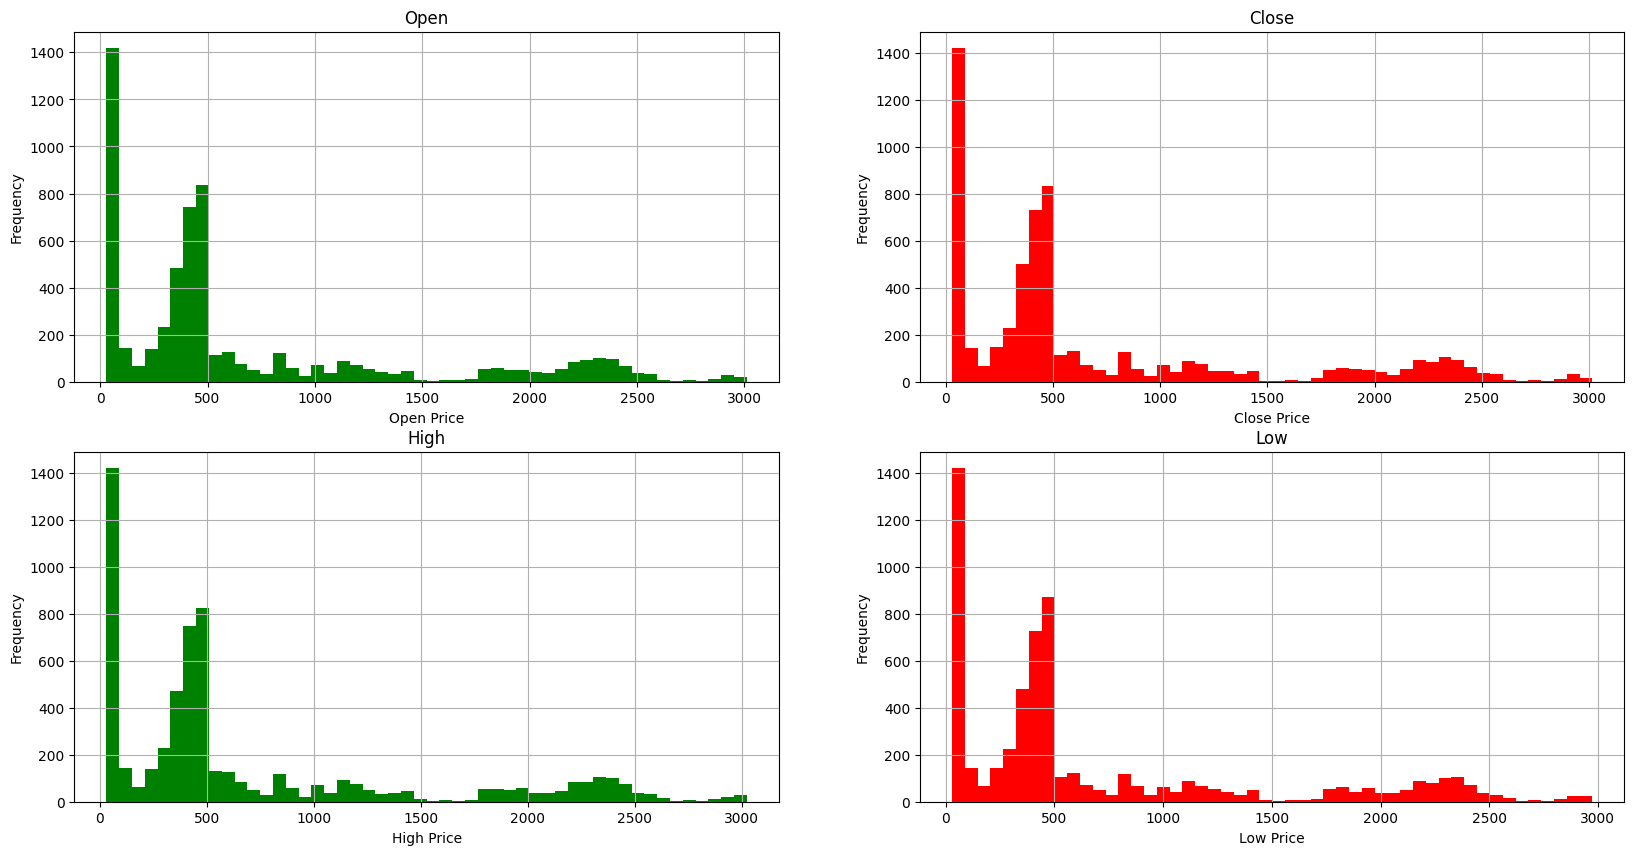

In [16]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance_df['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
plt.grid()
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance_df['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
plt.grid()
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance_df['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
plt.grid()
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance_df['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')
plt.grid()

<Axes: >

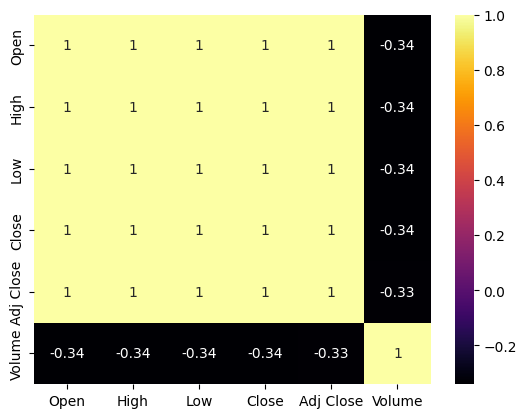

In [17]:
#Heatmap & correlation analysis

sns.heatmap(reliance_df.corr(),annot=True,cmap='inferno')

In [18]:
reliance_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

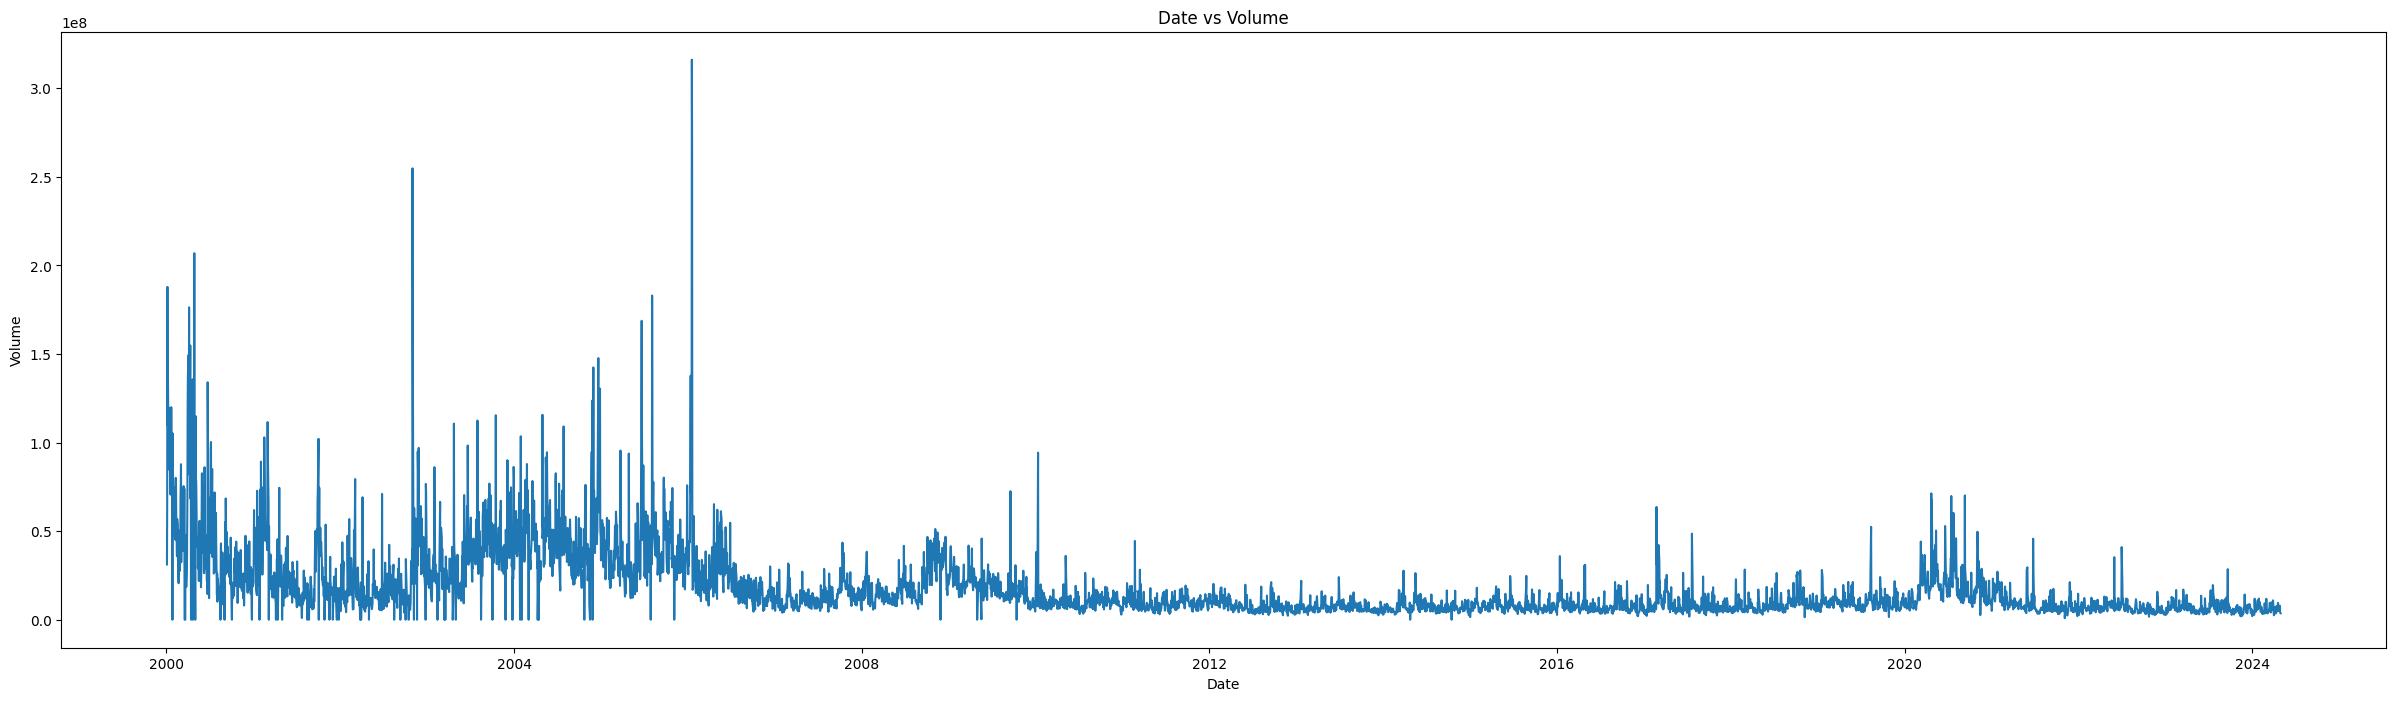

In [19]:
figure=plt.figure(figsize=(30,8))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

Text(0.5, 1.0, 'Close')

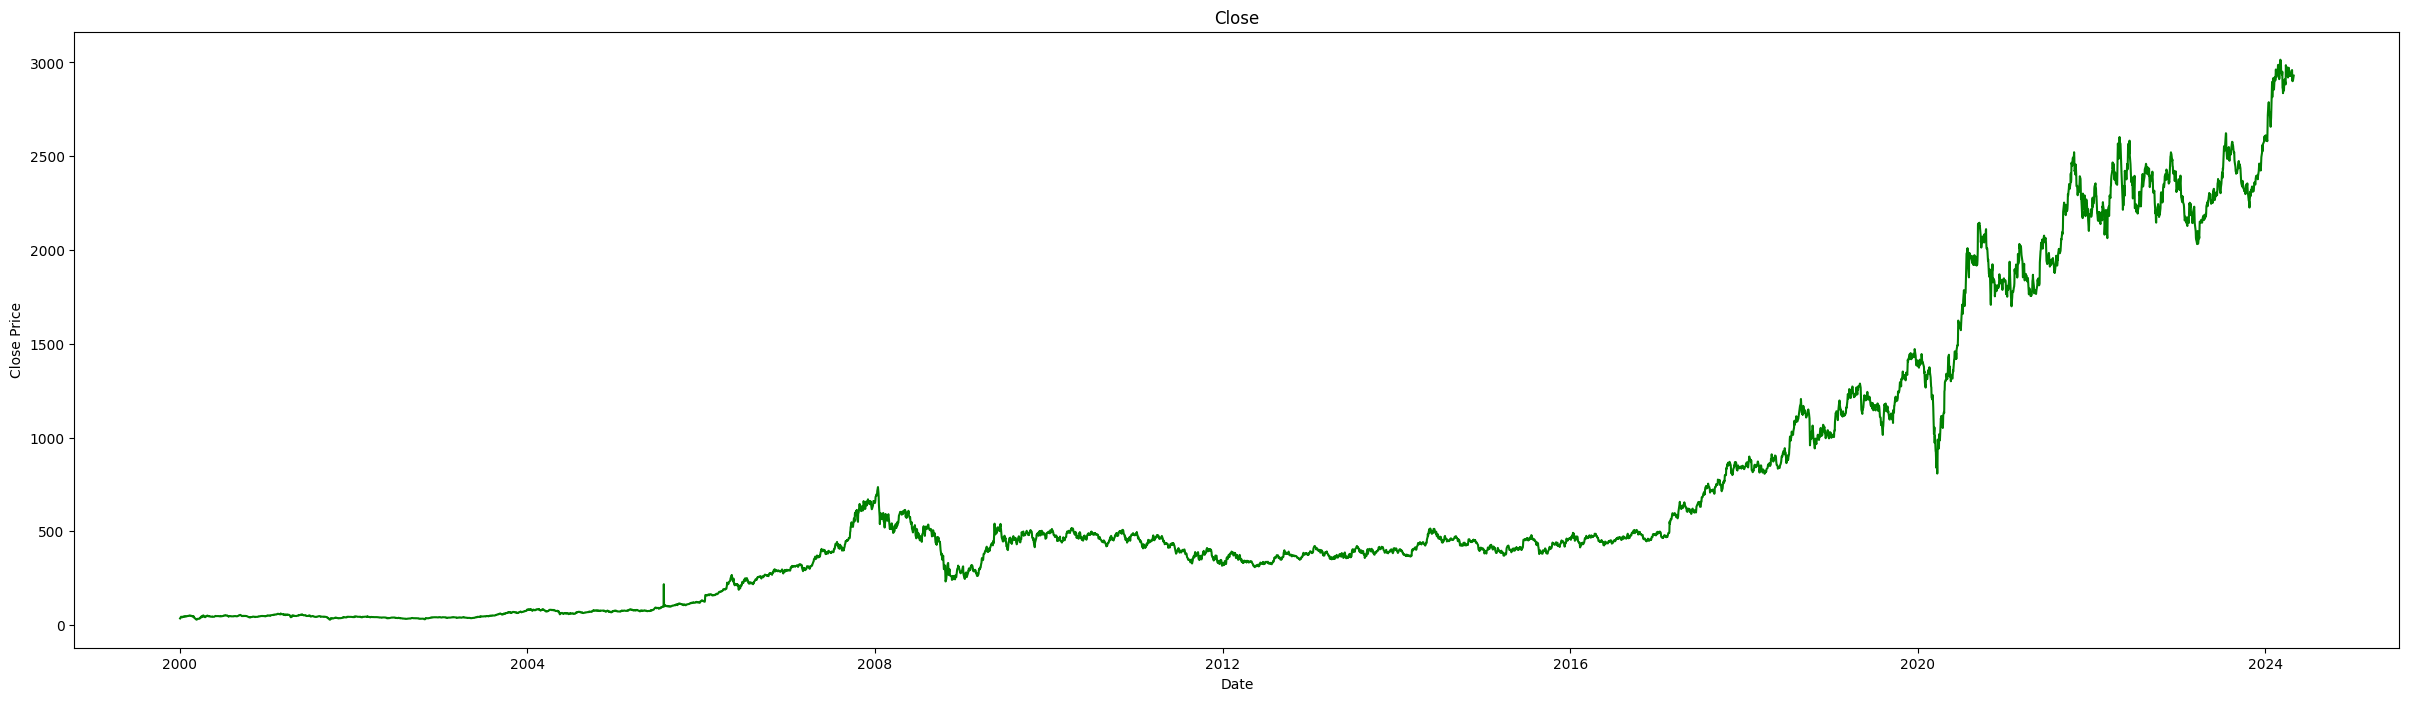

In [20]:
#Trend and Seasonality of Close Price

figure=plt.figure(figsize=(30,8))
plt.plot(reliance_df['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')

#Trend= linear trend,seasonality= multiplicative seasonality

.

.

.

In [21]:
reliance_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...
2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0


In [22]:
new_data=reliance_df.copy()

In [23]:
new_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0


#Normalization

In [24]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler(feature_range=(0,1)) #creating instance of minmax scaler
rescaled_df=scaler.fit_transform(new_data)  #transforming the array

#Transformed data
set_printoptions(precision=5)
print(rescaled_df[0:5,:])

[[0.00153 0.00154 0.00196 0.00232 0.00172 0.0987 ]
 [0.00253 0.0025  0.00262 0.00328 0.00243 0.21014]
 [0.00245 0.00326 0.00288 0.00379 0.00281 0.59433]
 [0.004   0.00387 0.00445 0.00436 0.00323 0.34734]
 [0.00429 0.00469 0.00465 0.00533 0.00394 0.44012]]


In [26]:
# Converting the transformed array back to a DataFrame

rescaled_df = pd.DataFrame(rescaled_df, columns=new_data.columns, index=new_data.index)

In [27]:
# Replace the original DataFrame with the rescaled values

new_data=rescaled_df
new_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.001532,0.001536,0.001956,0.002320,0.001718,0.098704
2000-01-04,0.002533,0.002497,0.002625,0.003284,0.002432,0.210144
2000-01-05,0.002449,0.003263,0.002884,0.003793,0.002809,0.594332
2000-01-06,0.003999,0.003874,0.004452,0.004360,0.003228,0.347343
2000-01-07,0.004286,0.004694,0.004646,0.005326,0.003944,0.440117
...,...,...,...,...,...,...
2024-04-23,0.982043,0.987339,0.978498,0.967797,0.967878,0.023099
2024-04-24,0.971648,0.970670,0.974392,0.961668,0.961764,0.016547
2024-04-25,0.957565,0.970286,0.968961,0.968233,0.968312,0.025216


#Train and Test Split

In [28]:
from sklearn.model_selection import train_test_split

# Define X and Y variables
X = new_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
Y = new_data['Close']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)


print('X_train : ',X_train.shape)
print('Y_train : ',Y_train.shape)
print('----------------------------------------')
print('x_test  :',x_test.shape)
print('y_test  : ',y_test.shape)

X_train :  (4854, 5)
Y_train :  (4854,)
----------------------------------------
x_test  : (1214, 5)
y_test  :  (1214,)


In [29]:
X_train.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2000-01-03,0.001532,0.001536,0.001956,0.001718,0.098704
2000-01-04,0.002533,0.002497,0.002625,0.002432,0.210144
2000-01-05,0.002449,0.003263,0.002884,0.002809,0.594332
2000-01-06,0.003999,0.003874,0.004452,0.003228,0.347343
2000-01-07,0.004286,0.004694,0.004646,0.003944,0.440117


In [30]:
Y_train.head()

Date
2000-01-03    0.002320
2000-01-04    0.003284
2000-01-05    0.003793
2000-01-06    0.004360
2000-01-07    0.005326
Name: Close, dtype: float64

#Differencing-To make data stationary

In [31]:
Y_train_diff=Y_train.diff().dropna()

In [32]:
Y_train_diff.head()

Date
2000-01-04    0.000964
2000-01-05    0.000509
2000-01-06    0.000567
2000-01-07    0.000966
2000-01-10   -0.000289
Name: Close, dtype: float64

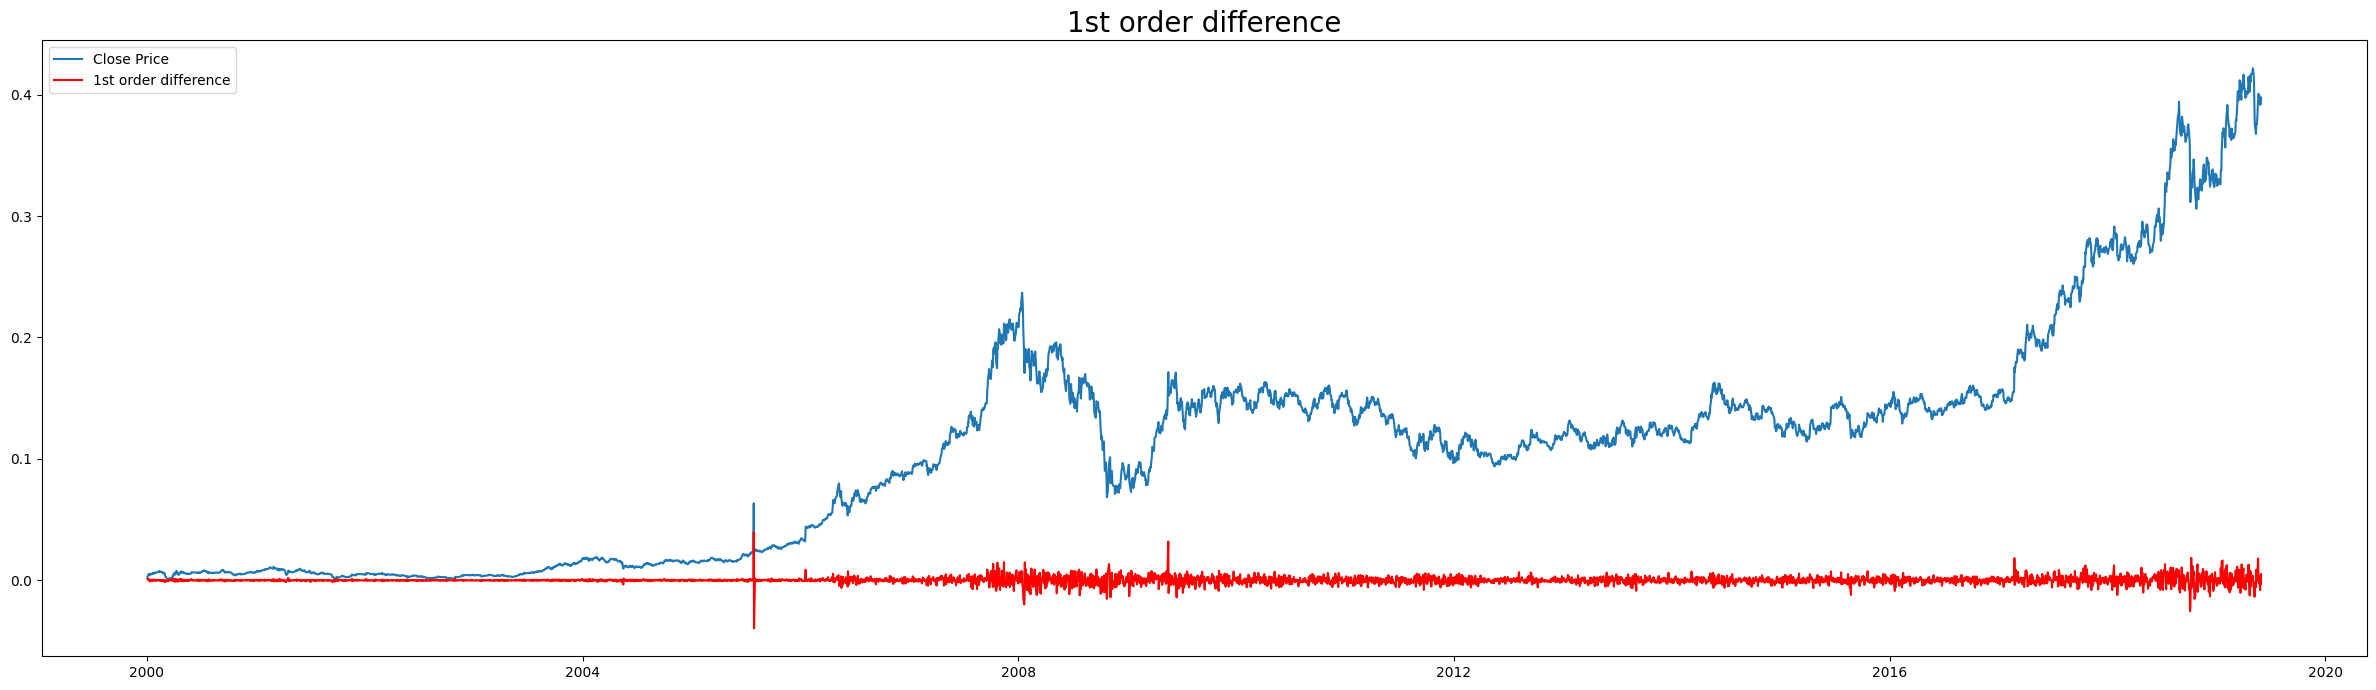

In [33]:
#Plot
plt.figure(figsize=(30,8))
plt.title("1st order difference", size=20)
plt.plot(Y_train, label='Close Price')
plt.plot(Y_train_diff, label='1st order difference',color='red')
plt.legend()

In [35]:
# Drop the first row from X_train to align with Y_train_diff
X_train_aligned = X_train.iloc[1:]
X_train_aligned.shape

(4853, 5)

In [36]:
# Ensure the lengths match
assert len(X_train_aligned) == len(Y_train_diff)


#ACF & PACF

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt

In [38]:
# Calculate Autocorrelation
acf_values = acf(Y_train_diff)
np.round(acf_values,2)
# acf helps us to identify MA order (q)
# pacf helps us to identify AR order (p)

array([ 1.  ,  0.04,  0.01, -0.05, -0.04, -0.07, -0.01, -0.01,  0.01,
        0.01,  0.02,  0.  ,  0.04,  0.04,  0.03,  0.01, -0.02, -0.07,
       -0.04, -0.  , -0.01,  0.  ,  0.01,  0.01,  0.  ,  0.01,  0.  ,
        0.01,  0.01, -0.02, -0.  ,  0.01,  0.01,  0.03,  0.04, -0.03,
       -0.03])

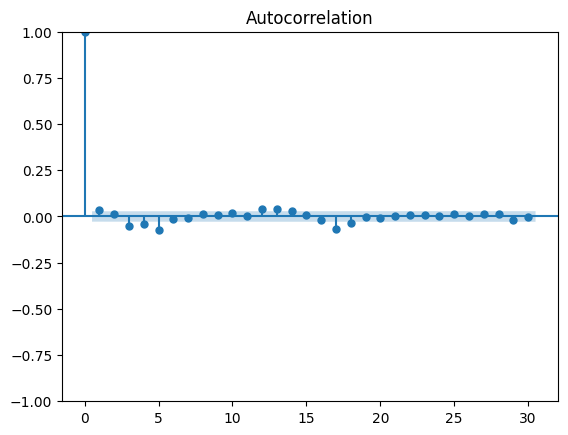

In [39]:
#PLOT OF ACF
plot_acf(Y_train_diff,lags=30)
plt.show()

In [40]:
# Calculate PACF
pacf_values = pacf(Y_train_diff)
np.round(pacf_values,2)

array([ 1.  ,  0.04,  0.01, -0.05, -0.04, -0.07, -0.01, -0.01,  0.  ,
        0.  ,  0.01, -0.  ,  0.04,  0.04,  0.03,  0.01, -0.01, -0.06,
       -0.02,  0.  , -0.01, -0.01, -0.  , -0.  , -0.  ,  0.01,  0.  ,
        0.01,  0.01, -0.01,  0.01,  0.02,  0.01,  0.03,  0.03, -0.04,
       -0.02])

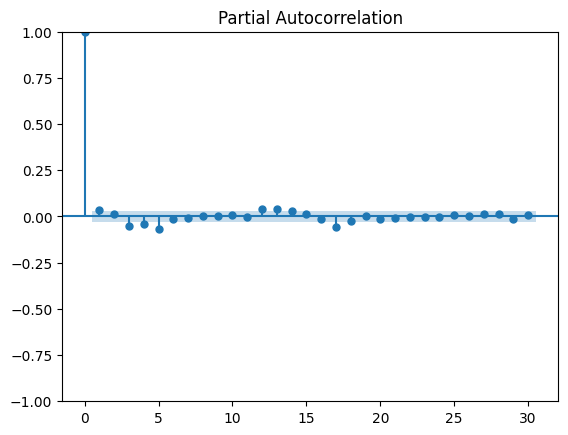

In [41]:
plot_pacf(Y_train_diff,lags=30)
plt.show()

#Model Building

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
# Fit ARIMA model on the differenced Y_train
arima_model = ARIMA(Y_train_diff, order=(1, 1, 1))  # Example parameters (p=1,d= 1, q=1)
arima_result = arima_model.fit()

# Forecasting on the test set (original scale)
Y_test_diff_pred = arima_result.forecast(steps=len(y_test))

# Invert differencing to get the final predictions
#Y_test_pred = Y_test_diff_pred.cumsum() + Y_train.iloc[-1]
#Y_test_pred = pd.Series(Y_test_pred, index=y_test.index)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [44]:
Y_test_diff_pred

4853    0.000538
4854    0.000379
4855    0.000374
4856    0.000374
4857    0.000374
          ...   
6062    0.000374
6063    0.000374
6064    0.000374
6065    0.000374
6066    0.000374
Name: predicted_mean, Length: 1214, dtype: float64

In [45]:
# Assuming Y_test_diff_pred is the series you have shown
# Ensure Y_test_diff_pred is a pandas Series if it is not already
Y_test_diff_pred = pd.Series(Y_test_diff_pred)

# Print the head of the differenced predictions for debugging
print('----------------------------------------------------')
print("Y_test_diff_pred (head):\n", Y_test_diff_pred.head())

# Add the last value of the original training data to the cumulative sum of the predictions
last_train_value = Y_train.iloc[-1]
print('---------------------------------------------------')
print("Last value of Y_train:", last_train_value)

# Calculate the cumulative sum of the differenced predictions
Y_test_pred_cumsum = Y_test_diff_pred.cumsum()

# Print the cumulative sum for debugging
print('-----------------------------------------------------')
print("Cumulative sum of Y_test_diff_pred (head):\n", Y_test_pred_cumsum.head())

# Add the last value of the training set to the cumulative sum to invert the differencing
Y_test_pred = Y_test_pred_cumsum + last_train_value

# Ensure Y_test_pred has the same index as Y_test
Y_test_pred.index = y_test.index

# Print the head of the final predictions for debugging
print('------------------------------------------------')
print("Y_test_pred (head):\n", Y_test_pred.head())

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Y_test_pred)
print('-----------------------------------------------')
print(f'Mean Squared Error: {mse}')


----------------------------------------------------
Y_test_diff_pred (head):
 4853    0.000538
4854    0.000379
4855    0.000374
4856    0.000374
4857    0.000374
Name: predicted_mean, dtype: float64
---------------------------------------------------
Last value of Y_train: 0.39748886533479555
-----------------------------------------------------
Cumulative sum of Y_test_diff_pred (head):
 4853    0.000538
4854    0.000917
4855    0.001291
4856    0.001665
4857    0.002038
Name: predicted_mean, dtype: float64
------------------------------------------------
Y_test_pred (head):
 Date
2019-05-31    0.398027
2019-06-03    0.398406
2019-06-04    0.398780
2019-06-06    0.399153
2019-06-07    0.399527
Name: predicted_mean, dtype: float64
-----------------------------------------------
Mean Squared Error: 0.0070400839943838165


In [46]:
x=pd.DataFrame(Y_test_pred)
x

,predicted_mean
Date,
2019-05-31,0.398027
2019-06-03,0.398406
2019-06-04,0.398780
2019-06-06,0.399153
2019-06-07,0.399527
...,...
2024-04-23,0.849621
2024-04-24,0.849995
2024-04-25,0.850369


In [47]:
# Evaluate the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Y_test_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0070400839943838165
